In [6]:
import numpy as np
import numpyro as npr
import numpyro.distributions as dist
from jax import random
from numpyro.infer import MCMC, NUTS
from scipy.special import expit
import jax.numpy as jnp
import jax.scipy.special as jss
import arviz as az
import matplotlib.pyplot as plt
import multiprocessing as mp
import pandas as pd
import seaborn as sns
from numpyro.infer.reparam import TransformReparam

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
sns.set()

In [9]:
samples = dist.Normal(0, 1).sample(random.PRNGKey(0), (1000, ))

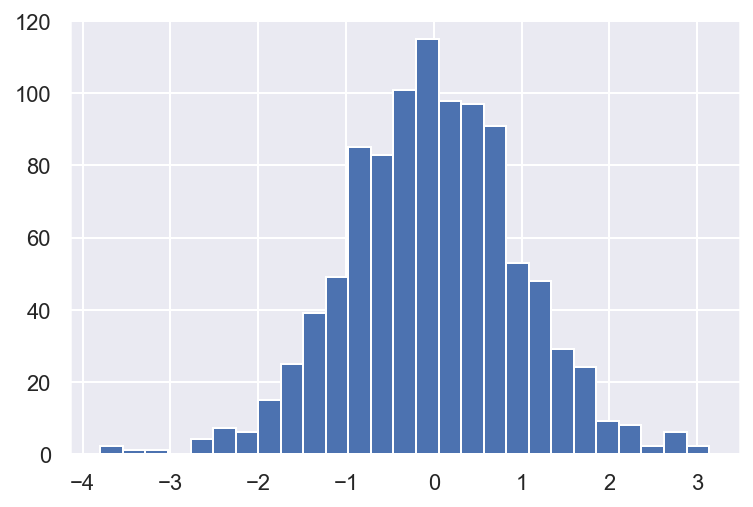

In [10]:
plt.hist(samples, bins='auto');

In [64]:
dist_x = dist.TransformedDistribution(dist.Normal(0, 1), 
                                      [dist.transforms.AffineTransform(0, 0.5),
                                       dist.transforms.SigmoidTransform()])
samples = dist_x.sample(random.PRNGKey(0), (1000, ))

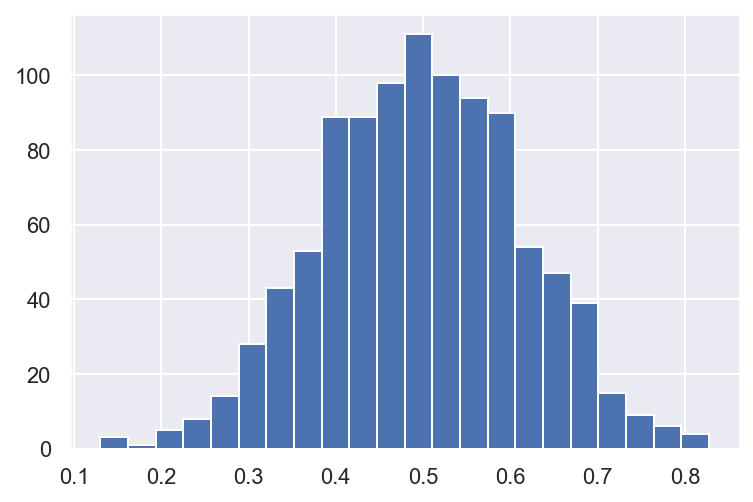

In [65]:
plt.hist(samples, bins='auto');

In [69]:
dist_x = dist.TransformedDistribution(dist.Normal(0, 1), 
                                      dist.transforms.AffineTransform(0, 0.5))

In [70]:
samples = dist_x.sample(random.PRNGKey(0), (1000, ))
samples = jss.expit(samples)

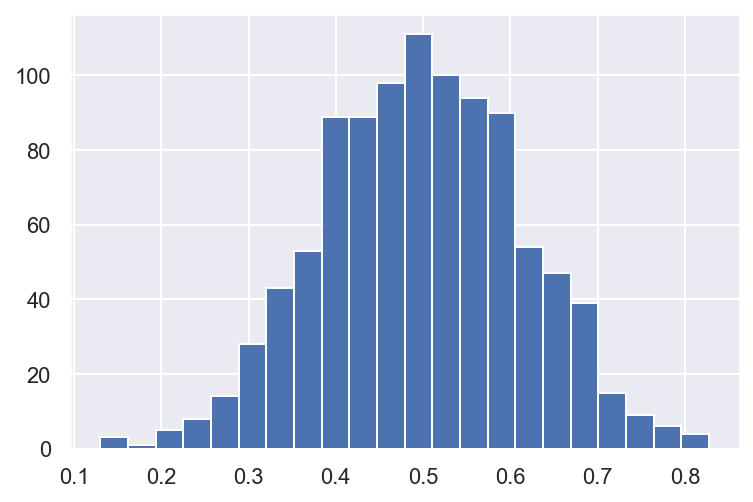

In [71]:
plt.hist(samples, bins='auto');

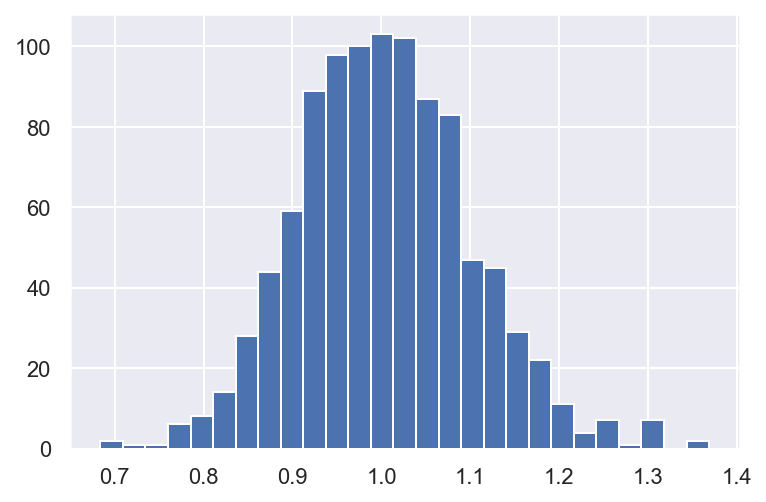

In [60]:
dist_x = dist.TransformedDistribution(dist.Normal(0, 1), 
                                      dist.transforms.AffineTransform(0, 0.1))
samples = dist_x.sample(random.PRNGKey(0), (1000, ))
samples = jnp.exp(samples)
plt.hist(samples, bins='auto');

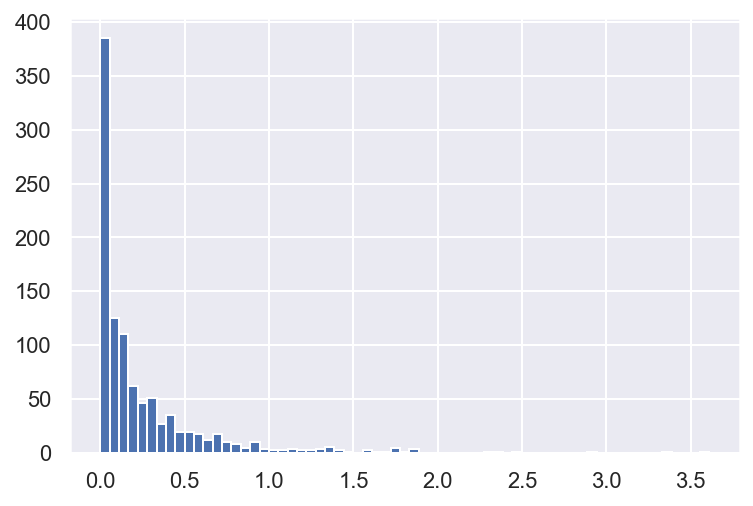

In [56]:
dist_x = dist.TransformedDistribution(dist.Normal(0, 1), 
                                      dist.transforms.AffineTransform(0, 0.5))
samples = dist_x.sample(random.PRNGKey(0), (1000, ))
samples = samples**2
plt.hist(samples, bins='auto');

In [63]:
jss.expit(jnp.array([-10.]))

DeviceArray([4.5397872e-05], dtype=float32)

In [94]:
p = 0.5
eps = np.finfo(float).eps
dist_x = dist.Bernoulli(logits=np.array([np.log(p+eps) - np.log(1-np.exp(np.log(p))+eps)]))
samples = dist_x.sample(random.PRNGKey(0), (1000, ))
print(np.mean(samples))

0.505


In [88]:
np.log(p) - np.log(1-p)

0.0